In [73]:
import numpy as np
from scipy.stats import kurtosis
from scipy.fft import fft2, fftshift
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob
from tqdm.contrib import tenumerate

In [74]:
def calc_2D_spectrum(img):
    img_fft = np.abs(fftshift(fft2(img, workers=10))) ** 2
    return img_fft

def brightness_corr(img):
    """Normalize the power spectrum to account for image-to-image brightness variation."""
    img_brightness_corr = img / np.mean(img) / img.size
    return img_brightness_corr

def calc_1D_spectrum_from_2D_spectrum(img):
    """Create 1D spectrum from 2D spectrum"""

    # Sum the sums of the columns and the rows.
    summed_spectrum = np.zeros(img.shape[0])
    column_sum = np.sum(img, axis=0)
    row_sum = np.sum(img, axis=1)
    summed_spectrum = column_sum + row_sum

    # "... and then adding corresponding 'negative' frequencies to the
    # 'positive' ones. This results in a N/2+1 1D array."
    spectrum_mid_idx = len(summed_spectrum) // 2
    summed_spectrum_pos = summed_spectrum[spectrum_mid_idx:] + np.flip(summed_spectrum[:spectrum_mid_idx])
    return summed_spectrum_pos

In [81]:
def select_channel(img, channel=0):
    try:
        return img[:, :, channel]
    except IndexError:
        return img

In [89]:
def calc_spectra_of_stack(directory: str):
    img_paths = glob(f"{directory}/*.bmp")

    all_spectra = np.zeros((len(img_paths), 500))
    for i, img_path in tenumerate(img_paths):
        img_pil = Image.open(img_path)
        img_arr = np.asarray(img_pil)
        img = select_channel(img_arr)

        spectrum_2d = calc_2D_spectrum(img)
        spectrum_2d_corr = brightness_corr(spectrum_2d)
        spectrum_1d = calc_1D_spectrum_from_2D_spectrum(spectrum_2d_corr)

        all_spectra[i] = spectrum_1d
    
    return all_spectra

  0%|          | 0/31 [00:00<?, ?it/s]

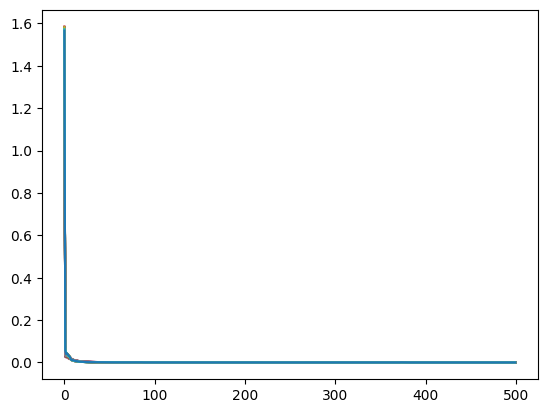

In [90]:
directory = "../data/preprocessed/z-stacks/24"
plt.plot(calc_spectra_of_stack(directory).T)
plt.show()